In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [2]:
SEED = 42

In [3]:
iris = datasets.load_iris()

In [4]:
x = iris['data'][:, (2, 3)]  # petal length, petal width
y = (iris['target'] == 2).astype(np.int)

In [5]:
log_reg = LogisticRegression(solver='lbfgs', C=10**10, random_state=SEED)
log_reg.fit(x, y)

LogisticRegression(C=10000000000, random_state=42)

In [9]:
y_pred = log_reg.predict([x[0]])
y_prob = log_reg.predict_proba([x[0]])
print(f"y = {y[0]}")
print(f"y_pred = {y_pred}")
print(f"y_prob = {y_prob}")

y = 0
y_pred = [0]
y_prob = [[1.00000000e+00 5.55428346e-16]]


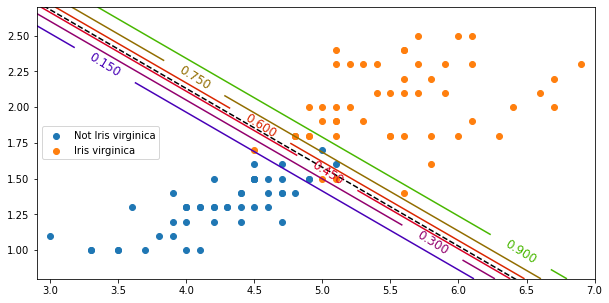

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(x[y==0, 0], x[y==0, 1], label="Not Iris virginica")
plt.scatter(x[y==1, 0], x[y==1, 1], label="Iris virginica")

x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1),
)
x_new = np.c_[x0.ravel(), x1.ravel()]
y_prob = log_reg.predict_proba(x_new)
zz = y_prob[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, 'k--')

plt.axis([2.9, 7, 0.8, 2.7])
plt.legend()
plt.show()